In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def pred(x,w):
  s = np.matmul(x,w)
  o = 1./(1+np.exp(-s))
  return o

$o = g(s) =\frac{1}{1+e^-s}$

In [ ]:
def loss_cross_entropy(x,w,y_t):
  y_o =pred(x,w)
  lo=np.sum(-(y_t*np.log(y_o)+(1.-y_t)*np.log(1.-y_o)))
  return lo

$L(W_0,W_1)=-(yln(0)+(1-y)ln(1-0))$

In [ ]:
def grad(x,w,y_t):
  h = 1e-4
  grad_tmp = []
  for idx in range(len(w)):
    w_temp = w.copy()
    w_temp[idx] +=h
    lo1= loss_cross_entropy(x,w_temp,y_t)

    w_temp[idx] -= 2*h
    lo2 = loss_cross_entropy(x,w_temp,y_t)
    grad_tmp.append((lo1-lo2)/(2.*h))
  return grad_tmp


In [ ]:
def Accuracy(x,w,y_t):
  y_p=pred(x,w_SGD)
  y_p[y_p<0.5]=0
  y_p[y_p>=0.5]=1
  return 100.*np.sum(y_p==y_t)/len(y_t)

y_p와 y_t가 같을 경우의 퍼센트

In [ ]:
def find(x,w,y_t):
  y_p =pred(x,w_SGD)
  y_p[y_p<0.5] =0
  y_p[y_p>=0.5] = 1
  tp=np.sum(y_p == y_t)
  fp =np.sum(y_p != y_t)
  tn = 0
  for i  in range(len(y_p)):
    if y_p[i] ==0 and  y_t[i]==0:
      tn +=1
  fn = 0
  for i  in range(len(y_p)):
    if y_p[i] ==0 and  y_t[i]==1:
      fn +=1
  return tp,fp,tn,fn
    
  

$TP = True Positive$ :
y_p와 y_t가 둘다 참
$FP = false positive$ :
y_p는 참 y_t 거짓  
$FN = false negative$ :
y_p는 거짓 y_t는 참
$TN = True negative$ :
y_p, y_t 둘다 거짓


In [ ]:
x_1 = np.array([0.50,0.75,1.0,1.25,1.5,1.75,1.75,2.0,2.25,2.5,2.8,3.00])
x = np.ones([len(x_1),2])
x[:,1] =x_1
x_s = np.array([3.0,3.5,4.0,4.25,4.50,5.0,5.00,5.5])
x_sample = np.ones([len(x_s),2])
x_sample[:,1] = x_s
y_1 = np.array([0,0,0,0,0,0,1,0,1,0,1,0])
y_t = np.ones([len(y_1),1])
y_t[:,0] = y_1
y_temp = np.array([1,0,1,1,1,1,1,1])
y_sample = np.ones([len(y_temp),1])
y_sample[:,0] =y_temp

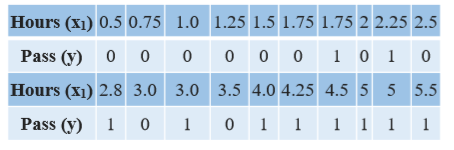

12개의 샘플을 이용해 {W0,W1} 구하고 8개의 샘플을 이용해 cross entropy 와 accuracy를 구한다.

Initial loss 	 = 8.0936
Final loss 	 = 5.9971
Accuracy 	 = 75.00%


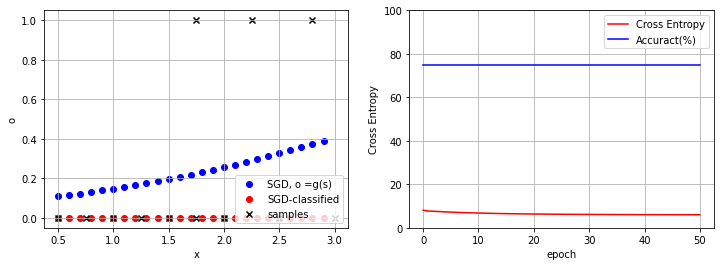

In [ ]:
np.random.seed(12)
w_SGD = np.random.randn(2,1)
w_SGD[0]=0

num_epoch = 50
lr_s = 0.15
accuracy_SGD = []
loss_SGD = []

loss_SGD.append(loss_cross_entropy(x,w_SGD,y_t))
accuracy_SGD.append(Accuracy(x,w_SGD,y_t))
print("Initial loss \t = %0.4f"% loss_cross_entropy(x,w_SGD,y_t))
for epoch in range(num_epoch):
  for idx in range(len(x)):
    grad_s = grad(x[idx:idx+1, 0:len(x[idx])],w_SGD,y_t[idx])
    w_SGD -=lr_s*np.asarray([grad_s]).T
  curr_loss = loss_cross_entropy(x,w_SGD,y_t)
  loss_SGD.append(curr_loss)
  accuracy_SGD.append(Accuracy(x,w_SGD,y_t))

print("Final loss \t = %0.4f\nAccuracy \t = %0.2f%%"%(loss_cross_entropy(x,w_SGD,y_t),Accuracy(x,w_SGD,y_t)))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

x1=np.arange(np.min(x[:,1]),np.max(x[:,1]),0.1)
xp = np.ones([len(x1),2])
xp[:,1] =x1
y_s = pred(xp,w_SGD)
plt.scatter(x1,y_s,color = 'b',label = 'SGD, o =g(s)')

y_s[(y_s)<0.5] =0
y_s[(y_s)>0.5] =1
plt.scatter(x1,y_s,color = 'r',label = 'SGD-classified')

plt.scatter(x[:,1],y_t,color = 'k',marker='x',label='samples')
plt.xlabel('x')
plt.ylabel('o')
plt.legend(loc = 'lower right')
plt.grid()

plt.subplot(1,2,2)
x1 = range(len(loss_SGD))
plt.plot(x1,loss_SGD,'r-',label='Cross Entropy')
plt.plot(x1,accuracy_SGD,'b-',label = 'Accuract(%)')
plt.ylim((0,100))
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Cross Entropy')
plt.show()




In [ ]:
test_accuracy = Accuracy(x_sample,w_SGD,y_sample)
test_cross_entropy = loss_cross_entropy(x_sample,w_SGD,y_sample)

print("test_accuracy = {}".format(test_accuracy))
print("test_cross_entropy = {}".format(test_cross_entropy))

test_accuracy = 87.5
test_cross_entropy = 3.8731930417919784


In [ ]:
tp,fp,tn,fn = find(x,w_SGD,y_t)
FPR = fp/(fp+tn)
FNR = fn/(tp+fn)
TPR = tp/(tp+fn)
TNR = tn/(fp+tn)

print("FPR = {}\nFNR = {}\nTPR = {}\nTNR = {}".format(FPR,FNR,TPR,TNR))

FPR = 0.25
FNR = 0.25
TPR = 0.75
TNR = 0.75


거짓 긍정률 (FPR = FP/(FP+TN))


거짓 부정률(FNR = FN/(TP+FN))

참 긍정률(TPR = TP/(TP+FN))

참 부정률(TNR=TN/(FP+TN))